<a href="https://colab.research.google.com/github/shiviverma916/myfile/blob/main/popularity%2Bbased%2Brecommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Popurarity Based Recommendation System**

In [1]:
import numpy as np
import pandas as pd

In [2]:
movie_names = pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_data = pd.read_csv("/content/ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')

In [5]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [6]:
movie_data.groupby('title')['rating'].mean().head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


In [7]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(50)

,rating
title,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0
Alien Escape (1995),5.0
Boiling Point (1993),5.0
Bone Tomahawk (2015),5.0
Borgman (2013),5.0
Survive and Advance (2013),5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993),5.0
"Last Dragon, The (1985)",5.0
Boy Crazy (2009),5.0


In [8]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291


In [9]:
movie_data[['title','rating']]

,title,rating
0,Dangerous Minds (1995),2.5
1,Dumbo (1941),3.0
2,Sleepers (1996),3.0
3,Escape from New York (1981),2.0
4,Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.0
...,...,...
99999,Raising Victor Vargas (2002),2.5
100000,Stevie (2002),4.0
100001,"Matrix Reloaded, The (2003)",4.0
100002,Whale Rider (2002),2.5


In [10]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [11]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [12]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [13]:
ratings_mean_count['rating'] = round(ratings_mean_count['rating'],1)

In [14]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2


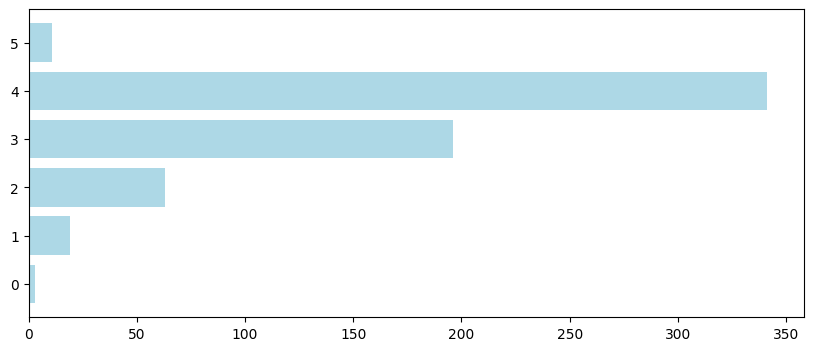

In [15]:
#plot rounded-up ratings with number of movies
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 4))
ax=plt.barh(ratings_mean_count['rating'].round(),ratings_mean_count['rating_counts'],color='lightblue')
plt.show()

In [16]:
ratings_mean_count = ratings_mean_count[(ratings_mean_count['rating'] > 3) & (ratings_mean_count['rating_counts'] > 100)]
ratings_mean_count

,rating,rating_counts
title,,
2001: A Space Odyssey (1968),3.9,123
Airplane! (1980),3.8,106
Aladdin (1992),3.7,215
Alien (1979),4.0,127
Aliens (1986),3.9,125
...,...,...
While You Were Sleeping (1995),3.4,101
Who Framed Roger Rabbit? (1988),3.7,108
Willy Wonka & the Chocolate Factory (1971),3.8,148


In [17]:
ratings_mean_count = ratings_mean_count.sort_values(by= 'rating',ascending=False).head(10)
ratings_mean_count

,rating,rating_counts
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Taxi Driver (1976),4.2,118
